In [2]:
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

pp = pprint.PrettyPrinter()

In [3]:
df = pd.read_csv('../data/rotten_tomatoes.csv')

### Pre-processing
2 most important preprocessing technique is the following: [1] **Normalization** [2] **Missing Values**. In real-world scenarios, these adjustments can significantly impact on the final results. We can normalize data using methods such as MinMax or Standard scaler. Plus, we can handle missing values using methods such as zero replacement or deletion. For sake of simplicity, I used straightforward methods in this implementation, and didn't explore their efficacies. Note that I stored raw data in contrary to processed data. It is not best practice to store processed data. 

In [4]:
assert df.columns[0]=="Unnamed: 0"
df.rename(columns={"Unnamed: 0": "Name"}, inplace=True)
df.head()

,Name,Action&Adventure,Animation,Anime&Manga,ArtHouse&International,Classics,Comedy,CultMovies,Documentary,Drama,...,Horror,Kids&Family,Musical&PerformingArts,Mystery&Suspense,Romance,ScienceFiction&Fantasy,SpecialInterest,Sports&Fitness,Television,Western
0,Lee Aaker,5.0,NaN,NaN,1.0,4.0,5.0,NaN,NaN,3.0,...,1.0,2.0,2.0,1.0,1.0,NaN,NaN,NaN,1.0,2.0
1,Willie Aames,2.0,NaN,NaN,3.0,1.0,7.0,NaN,NaN,6.0,...,2.0,2.0,1.0,1.0,1.0,2.0,NaN,NaN,2.0,NaN
2,Quinton Aaron,NaN,NaN,NaN,1.0,NaN,8.0,NaN,1.0,8.0,...,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,NaN
3,Victor Aaron,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,Abbott and Costello,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.fillna(0, inplace=True) #modify the original dataframe
df.head()

,Name,Action&Adventure,Animation,Anime&Manga,ArtHouse&International,Classics,Comedy,CultMovies,Documentary,Drama,...,Horror,Kids&Family,Musical&PerformingArts,Mystery&Suspense,Romance,ScienceFiction&Fantasy,SpecialInterest,Sports&Fitness,Television,Western
0,Lee Aaker,5.0,0.0,0.0,1.0,4.0,5.0,0.0,0.0,3.0,...,1.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0
1,Willie Aames,2.0,0.0,0.0,3.0,1.0,7.0,0.0,0.0,6.0,...,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0
2,Quinton Aaron,0.0,0.0,0.0,1.0,0.0,8.0,0.0,1.0,8.0,...,2.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0
3,Victor Aaron,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Abbott and Costello,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mms = MinMaxScaler()
normalized_data = mms.fit_transform(df[df.columns[1:]])
df_norm = pd.DataFrame(normalized_data, columns=df.columns[1:])
df_norm.head()

,Action&Adventure,Animation,Anime&Manga,ArtHouse&International,Classics,Comedy,CultMovies,Documentary,Drama,Faith&Spirituality,...,Horror,Kids&Family,Musical&PerformingArts,Mystery&Suspense,Romance,ScienceFiction&Fantasy,SpecialInterest,Sports&Fitness,Television,Western
0,0.106383,0.0,0.0,0.076923,0.078431,0.116279,0.0,0.0000,0.053571,0.0,...,0.071429,0.074074,0.076923,0.045455,0.047619,0.0000,0.00,0.0,0.090909,0.035088
1,0.042553,0.0,0.0,0.230769,0.019608,0.162791,0.0,0.0000,0.107143,0.5,...,0.142857,0.074074,0.038462,0.045455,0.047619,0.1250,0.00,0.0,0.181818,0.000000
2,0.000000,0.0,0.0,0.076923,0.000000,0.186047,0.0,0.0625,0.142857,0.0,...,0.142857,0.074074,0.038462,0.136364,0.047619,0.0625,0.25,1.0,0.090909,0.000000
3,0.063830,0.0,0.0,0.000000,0.000000,0.023256,0.0,0.0000,0.053571,0.0,...,0.000000,0.000000,0.000000,0.045455,0.000000,0.0000,0.00,0.0,0.000000,0.017544
4,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.00,0.0,0.000000,0.000000


### Machine Learning
I scraped the online resources and built the required dataframe in the previous steps. Now, I can start analyzing our data, and try to cluster it according to a new theme as instructed in the problem description. A new theme is a criteria that we can use to cluster celebrities such that those within a cluster have highest similarities (low intra-cluster distance) and those across clusters have lowest similarities (high inter-cluster distance). 

#### Dimension Reduction
One of the main applications of dimension reduction is to visualize high-dimension dataa. In this step, I used principal componenet analysis (PCA), a classic dimension reduction techniqe. First, I calculated the principal components that contain 95% of the total energy. Then, I used transformed data for sake of visualization.

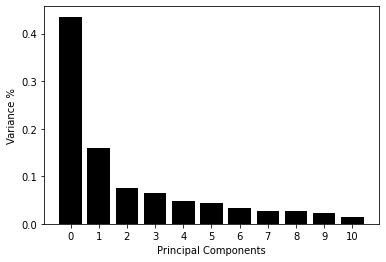

In [8]:
pca = PCA(n_components=0.95)
df_reduced = pca.fit_transform(df_norm)
assert(len(df_reduced[0]) < len(df_norm.loc[0,:]))

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(features)
plt.show()

#### What about the optimum num_cluster?
In clustering problems, one of the most important questions is "what is the right number of clusters?". Since we do not have apriori knowledge of the data, there is no right answer but there is an optimum answer. To solve the clustering problem, we can use different objective functions calculated based on intra-cluster and/or inter-cluster distances. Here, I used 2 standard methos are **Elbow** and **Silhouette** methods. The Elbow method only uses intra-cluster distances while the Silhouette method uses inter- and intra-cluster distances.

#### Elbow Method

This section shows that we will have elbow point at num_cluster = 3.  I can write a method to extract elbow point in an automated fashion; however, I determine it by observation for sake of simplicity.  

In [9]:
cluster_range = range(1, 20) 

def kmeans_simple(data, cluster_range):
    inertias = []
    for num_cluster in tqdm(cluster_range, total=len(cluster_range)):
        model = KMeans(n_clusters=num_cluster)
        model.fit(data)
        inertias.append(model.inertia_)
   
    return inertias

inertias_norm = kmeans_simple(df_norm, cluster_range)
inertias_reduced = kmeans_simple(df_reduced, cluster_range)



100%|██████████| 19/19 [00:01<00:00, 17.00it/s]


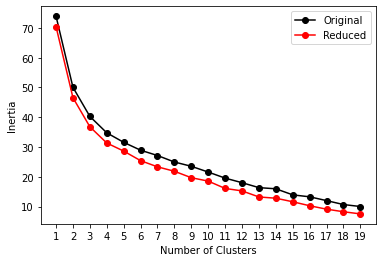

In [10]:
plt.figure()
plt.plot(cluster_range, inertias_norm, '-o', color='black', label = 'Original')
plt.plot(cluster_range, inertias_reduced, '-o', color='red', label = 'Reduced')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.legend()
plt.show()

#### Silhouette Method

This section shows that we will have maximum silhouette score by selecting 2 or 3 as number of clusters. 

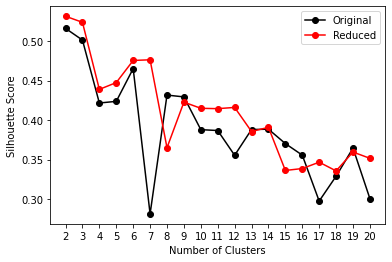

In [11]:
def kmeans(data, distance_metric, kmax):
    sil = []
    for k in range(2, kmax+1):
        kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(data)
        labels = kmeans.labels_
        sil_coeff = silhouette_score(data, labels, metric = distance_metric )
        sil.append(sil_coeff)    
    
    return sil

kmax = 20
sil_norm = kmeans(df_norm, 'euclidean', kmax )
sil_reduced = kmeans(df_reduced, 'euclidean', kmax)
       
plt.figure()
plt.plot(range(2, kmax+1), sil_norm, '-o', color='black', label = 'Original')
plt.plot(range(2, kmax+1), sil_reduced, '-o', color='red', label='Reduced')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, kmax+1))
plt.legend()
plt.show()

### So What?
As instructed in the problem description, I was asked to define a *new theme* and *cluster* celebrities accordingly. First, I represented data in a new space with 20+ dimensions each of which is a genre reported in Rotten Tomato website. If I can cluster data in a few clusters with meaningful separability, I will have the answer. The above implementation shows that data can be clustered to 3 clusters with meaninful separability. Each cluster has a centroid. A new data (celebrity) would belong to a cluster (theme) with lowest distance to the centroid. 

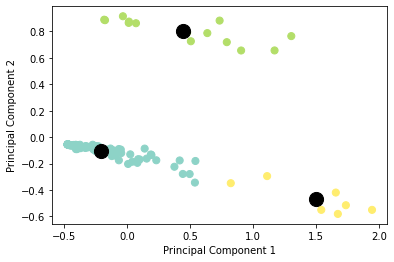

In [12]:
pca = PCA(n_components=10)
df_reduced = pca.fit_transform(df_norm)
pca_components = pd.DataFrame(df_reduced)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_reduced)
y_kmeans = kmeans.predict(df_reduced)
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(pca_components[0], pca_components[1], c=y_kmeans, s=50, cmap='Set3')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200)
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_norm)
y_kmeans = kmeans.predict(df_norm)
centers = kmeans.cluster_centers_

res = list(zip(df['Name'], y_kmeans))
clusters = {}
for item in res:
    if item[1] in clusters:
        clusters[item[1]].append(item[0])
    else:
        clusters[item[1]] = []

pp.pprint(clusters)

{0: ['Willie Aames',
     'Victor Aaron',
     'Abbott and Costello',
     'Bruce Abbott',
     'Philip Abbott',
     'Jake Abel',
     'Walter Abel',
     'Zachary Abel',
     'Jon Abrahams',
     'Omid Abtahi',
     'Yousef Abu-Taleb',
     'Kirk Acevedo',
     'Jensen Ackles',
     'Rodolfo Acosta',
     'Ad-Rock',
     'Robert Adair',
     'CJ Adams',
     'Don Adams',
     'Ernie Adams',
     'J. B. Adams',
     'Joe Adams',
     'Julian Adams',
     'Mason Adams',
     'Nick Adams',
     'R. J. Adams',
     'Rob Adams',
     'Ted Adams',
     'Victor Adamson',
     'Thom Adcox-Hernandez',
     'Anthony Addabbo',
     'Wesley Addy',
     'Tunde Adebimpe',
     'Ilunga Adell',
     'Paul Adelstein',
     'Jovan Adepo',
     'Patrick Adiarte',
     'Lawrence Adisa',
     'Trace Adkins',
     'Jay Adler',
     'Jerry Adler',
     'Joe Adler',
     'Julius Adler',
     'Luther Adler',
     'Matt Adler',
     'Max Adler',
     'James Adomian',
     'Franklin Adreon',
     'Scott Adsit'

### FUTURE WORKS
I wanted to build a solid **pipeline** to execute things in a more clear fashion but I couldn't find time. Plus, a method that takes a celebrity name and find which cluster it belongs can also be useful. 